# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

Семеное положение влияет на зарплпту, 
возраст влияет на ошибки
возраст плюс семейное положение продолжительность работы в компании как влияют на зарплату
dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

# Проверим следующие гипотезы:
1. Возраст сотрудника влияет на качество его работы. Среднее количество ошибок за день связано с возрастом.
2. Возраст сотрудника влияет на величину заработной платы.
3. Семеное положение влияет на количество ошибок.
4. Семеное положение влияет на величину заработной платы.
5. Количество ошибок сотрудников компании зависит от материального положения сотрудника.
6. Возраст и пол сотрудника влияют на количество ошибок.
7. Возраст и пол сотрудника влияют на зарплату.
8. Чем больше лет сотрудник работает в компании, тем меньше ошибок он совершает.
9. Чем больше лет сотрудник работает в компании, тем выше его зработная плата.
10. Сотрудник являющийся гражданином Соединенных Штатов Америки более добросовестно выполняет работу и меньше допускает ежедневных ошибок.

In [1]:
# Импорт библиотек Psycopg2, Numpy, Pandas
import psycopg2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# Подключение к базе данных PostgreSQL
conn = psycopg2.connect(**{'host': 'dsstudents.skillbox.ru', 
                           'port': 5432, 
                           'dbname': 'human_resources', 
                           'user': 'readonly', 
                           'password': '6hajV34RTQfmxhS'})

# Получение информации о структуре таблицы hr_dataset

hr_df = pd.read_sql_query('select * from hr_dataset', conn).info()
hr_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   310 non-null    int64  
 1   Employee Name        310 non-null    object 
 2   Employee Number      310 non-null    int64  
 3   marriedid            310 non-null    int64  
 4   maritalstatusid      310 non-null    int64  
 5   genderid             310 non-null    int64  
 6   empstatus_id         310 non-null    int64  
 7   deptid               310 non-null    int64  
 8   perf_scoreid         310 non-null    int64  
 9   age                  310 non-null    int64  
 10  Pay Rate             310 non-null    float64
 11  state                310 non-null    object 
 12  zip                  310 non-null    int64  
 13  dob                  310 non-null    object 
 14  sex                  310 non-null    object 
 15  maritaldesc          310 non-null    obj

In [2]:
# Получение информации о структуре таблицы production_staff
pd.read_sql_query('select * from production_staff', conn).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   256 non-null    int64  
 1   Employee Name        209 non-null    object 
 2   Race Desc            209 non-null    object 
 3   Date of Hire         209 non-null    object 
 4   TermDate             83 non-null     object 
 5   Reason for Term      209 non-null    object 
 6   Employment Status    209 non-null    object 
 7   Department           209 non-null    object 
 8   Position             209 non-null    object 
 9   Pay                  209 non-null    object 
 10  Manager Name         209 non-null    object 
 11  Performance Score    209 non-null    object 
 12  Abutments/Hour Wk 1  208 non-null    float64
 13  Abutments/Hour Wk 2  208 non-null    float64
 14  Daily Error Rate     208 non-null    float64
 15  90-day Complaints    208 non-null    flo

In [3]:
# Получение информации о структуре таблицы recruiting_cost
pd.read_sql_query('select * from recruiting_costs', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 22 non-null     int64 
 1   Employment Source  22 non-null     object
 2   January            22 non-null     int64 
 3   February           22 non-null     int64 
 4   March              22 non-null     int64 
 5   April              22 non-null     int64 
 6   May                22 non-null     int64 
 7   June               22 non-null     int64 
 8   July               22 non-null     int64 
 9   August             22 non-null     int64 
 10  September          22 non-null     int64 
 11  October            22 non-null     int64 
 12  November           22 non-null     int64 
 13  December           22 non-null     int64 
 14  Total              22 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.7+ KB


In [4]:
# Получение информации о структуре таблицы salary_grid
pd.read_sql_query("select * from salary_grid", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          12 non-null     int64  
 1   Position    12 non-null     object 
 2   Salary Min  12 non-null     int64  
 3   Salary Mid  12 non-null     int64  
 4   Salary Max  12 non-null     int64  
 5   Hourly Min  12 non-null     float64
 6   Hourly Mid  12 non-null     float64
 7   Hourly Max  12 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 896.0+ bytes


In [66]:
# Получение из базы данных информации по ошибкам сотрудников компании в зависимости от возраста
column = 'age'
sql_query = '''
    select
    CASE WHEN hr.age BETWEEN 25 AND 30 THEN '25-30'
         WHEN hr.age BETWEEN 30 AND 35 THEN '30-35'
         WHEN hr.age BETWEEN 35 AND 40 THEN '35-40'
         WHEN hr.age BETWEEN 40 AND 45 THEN '40-45'
         WHEN hr.age BETWEEN 45 AND 50 THEN '45-50'
         WHEN hr.age BETWEEN 50 AND 55 THEN '50-55'
         WHEN hr.age BETWEEN 55 AND 60 THEN '55-60'
         WHEN hr.age BETWEEN 60 AND 65 THEN '60-65'
         WHEN hr.age BETWEEN 65 AND 70 THEN '30-35'
         ELSE '0'
    END as Возраст, avg(pr."Daily Error Rate") as СрОшиб,avg(hr."Pay Rate") as СрЗарпл 
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position") group by Возраст order by Возраст'''
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)
staff_df

,Возраст,СрОшиб,СрЗарпл
0,25-30,0.826087,34.217059
1,30-35,1.000000,29.663444
2,35-40,1.069767,30.248644
3,40-45,0.738095,29.223800
4,45-50,0.764706,34.774138
5,50-55,1.166667,33.700000
6,55-60,0.500000,21.000000
7,60-65,0.500000,39.583333


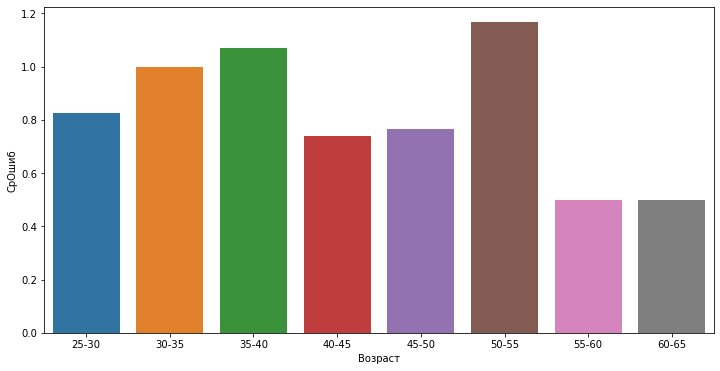

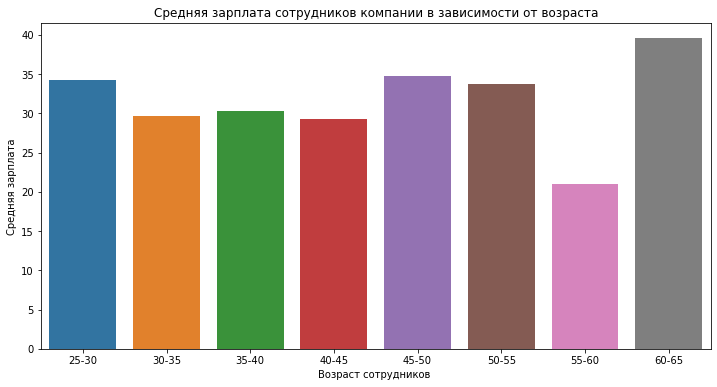

In [67]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(data=staff_df, x = staff_df['Возраст'], y=staff_df['СрОшиб'])
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title('Среднее количество ошибок сотрудников компании в зависимости от возраста')
ax.set_xlabel('Возраст сотрудников ')
ax.set_ylabel('Среднее количество ошибок')
sns.barplot(data=staff_df, x = staff_df['Возраст'], y=staff_df['СрЗарпл'])
ax.set_title('Средняя зарплата сотрудников компании в зависимости от возраста')
ax.set_xlabel('Возраст сотрудников ')
ax.set_ylabel('Средняя зарплата')
plt.show()

In [7]:
# Получение из базы данных информации по ошибкам сотрудников компании в зависимости от семейного положения
column = 'marriedid'
sql_query = '''
    select hr.'''+column+''', avg(pr."Daily Error Rate") as СрОшиб,avg(hr."Pay Rate") as СрЗарпл 
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position") group by hr.'''+column+''' order by hr.'''+column+''''''
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)
staff_df#.describe()

,marriedid,СрОшиб,СрЗарпл
0,0,0.880952,30.956684
1,1,0.962025,31.783659


Text(0, 0.5, 'Средняя зарплата')

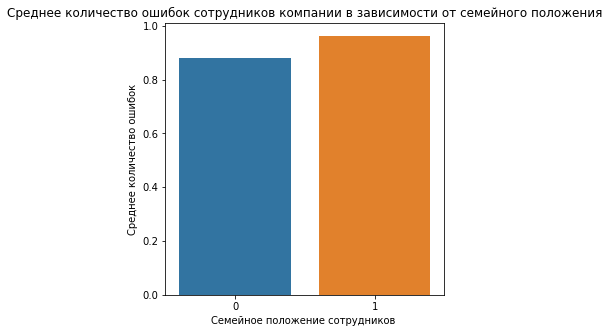

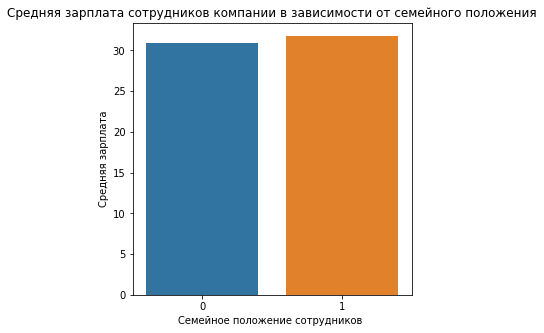

In [8]:
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=staff_df, x = staff_df[column], y=staff_df['СрОшиб'])

ax.set_title('Среднее количество ошибок сотрудников компании в зависимости от семейного положения')
ax.set_xlabel('Семейное положение сотрудников ')
ax.set_ylabel('Среднее количество ошибок')
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=staff_df, x = staff_df[column], y=staff_df['СрЗарпл'])
ax.set_title('Средняя зарплата сотрудников компании в зависимости от семейного положения')
ax.set_xlabel('Семейное положение сотрудников ')
ax.set_ylabel('Средняя зарплата')
#plt.show()

In [9]:
# Получение из базы данных информации по ошибкам сотрудников компании в зависимости от материального положения
column = 'maritalstatusid'
sql_query = '''
    select hr.'''+column+''', avg(pr."Daily Error Rate") 
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position") group by hr.'''+column+''' order by hr.'''+column+''''''
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)
staff_df.describe()

,maritalstatusid,avg
count,5.000000,5.000000
mean,2.000000,0.875834
std,1.581139,0.126060
min,0.000000,0.708333
25%,1.000000,0.777778
50%,2.000000,0.931034
75%,3.000000,0.962025
max,4.000000,1.000000


Text(0, 0.5, 'среднее количество ошибок')

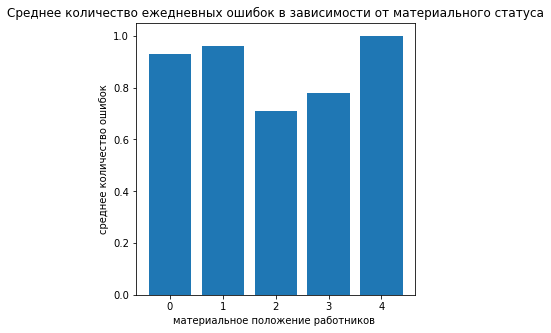

In [10]:
fig, ax = plt.subplots(figsize = (5,5))
plt.bar(staff_df[column],staff_df['avg'])
plt.title('Среднее количество ежедневных ошибок в зависимости от материального статуса')
plt.xlabel('материальное положение работников ')
plt.ylabel('среднее количество ошибок')

In [69]:
# Получение из базы данных информации по ошибкам и зп сотрудников компании в зависимости от возраста и пола 

column = 'age'
column1 = 'sex'
sql_query = '''
    select 
    CASE WHEN hr.age BETWEEN 25 AND 30 THEN '25-30'
         WHEN hr.age BETWEEN 30 AND 35 THEN '30-35'
         WHEN hr.age BETWEEN 35 AND 40 THEN '35-40'
         WHEN hr.age BETWEEN 40 AND 45 THEN '40-45'
         WHEN hr.age BETWEEN 45 AND 50 THEN '45-50'
         WHEN hr.age BETWEEN 50 AND 55 THEN '50-55'
         WHEN hr.age BETWEEN 55 AND 60 THEN '55-60'
         WHEN hr.age BETWEEN 60 AND 65 THEN '60-65'
         WHEN hr.age BETWEEN 65 AND 70 THEN '30-35'
         ELSE '0'
    END as Возраст, hr.'''+column1+''' as Пол, avg(pr."Daily Error Rate") as СрОшиб,avg(hr."Pay Rate") as СрЗарпл 
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position") group by Возраст, hr.'''+column1+''' order by Возраст'''
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)
staff_df#.describe()

,Возраст,Пол,СрОшиб,СрЗарпл
0,25-30,Male,0.600000,36.735294
1,25-30,Female,0.888889,32.957941
2,30-35,Male,0.640000,31.350476
3,30-35,Female,1.257143,28.187292
4,35-40,Female,1.363636,30.762727
5,35-40,Male,0.761905,29.596154
6,40-45,Male,0.764706,33.170455
7,40-45,Female,0.720000,26.122857
8,45-50,Male,0.250000,47.503846
9,45-50,Female,0.923077,24.431250


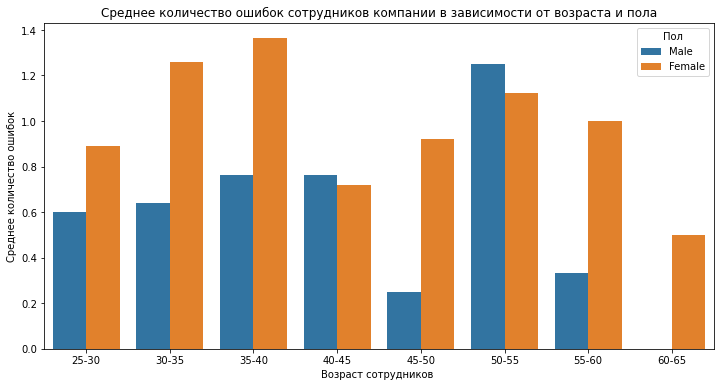

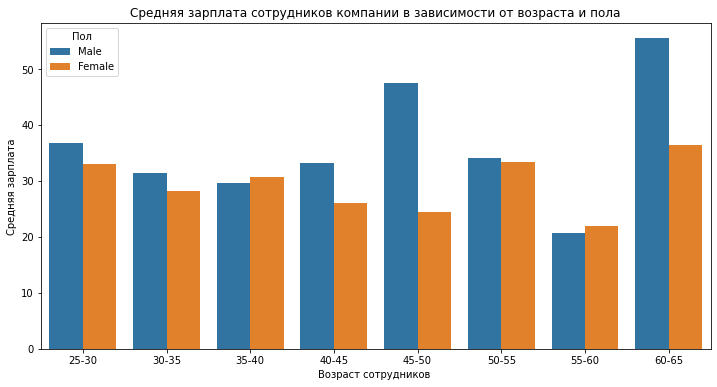

In [70]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(data=staff_df, x = staff_df['Возраст'], y=staff_df['СрОшиб'],hue ='Пол')

ax.set_title('Среднее количество ошибок сотрудников компании в зависимости от возраста и пола')
ax.set_xlabel('Возраст сотрудников ')
ax.set_ylabel('Среднее количество ошибок')
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(data=staff_df, x = staff_df['Возраст'], y=staff_df['СрЗарпл'],hue ='Пол')
ax.set_title('Средняя зарплата сотрудников компании в зависимости от возраста и пола')
ax.set_xlabel('Возраст сотрудников ')
ax.set_ylabel('Средняя зарплата')
plt.show()

In [51]:
# Получение из базы данных информации по ошибкам сотрудников компании в зависимости от времени работы в компании
column = 'Days Employed'
sql_query = '''
    select 
       CASE WHEN hr."Days Employed" < 365 THEN 1
            WHEN hr."Days Employed" BETWEEN 365 AND 730 THEN 2
            WHEN hr."Days Employed" BETWEEN 730 AND 1095 THEN 3
            WHEN hr."Days Employed" BETWEEN 1095 AND 1460  THEN 4
            WHEN hr."Days Employed" BETWEEN 1460 AND 1825 THEN 5
            WHEN hr."Days Employed" BETWEEN 1825 AND 2190 THEN 6
            WHEN hr."Days Employed" BETWEEN 2190 AND 2555 THEN 7
            WHEN hr."Days Employed" BETWEEN 2555 AND 2920 THEN 8
            WHEN hr."Days Employed" BETWEEN 2920 AND 3285 THEN 9
            WHEN hr."Days Employed" BETWEEN 3285 AND 3650 THEN 10
            WHEN hr."Days Employed" BETWEEN 3650 AND 4015 THEN 11
            WHEN hr."Days Employed" BETWEEN 4015 AND 4380 THEN 12
       ELSE '0'
    END as "Длительность работы",   
    avg(pr."Daily Error Rate") as СрОшиб,avg(hr."Pay Rate") as СрЗарпл 
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position") group by "Длительность работы" order by "Длительность работы"'''
staff_df = pd.read_sql_query(sql_query, conn).fillna(0)
staff_df#.describe()

,Длительность работы,СрОшиб,СрЗарпл
0,1,0.961538,29.607895
1,2,1.208333,33.973513
2,3,0.954545,32.190000
3,4,0.844444,30.818429
4,5,0.975610,27.256458
5,6,0.807692,32.288056
6,7,0.692308,32.135909
7,8,0.000000,38.771429
8,9,0.000000,42.987500
9,10,1.000000,24.750000


Text(0, 0.5, 'Среднее количество ошибок')

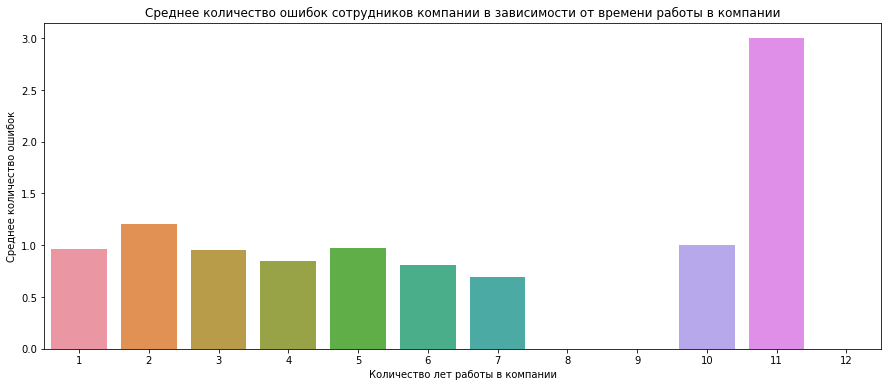

In [53]:
fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(data=staff_df, x = staff_df["Длительность работы"], y=staff_df['СрОшиб'])
ax.set_title('Среднее количество ошибок сотрудников компании в зависимости от времени работы в компании')
ax.set_xlabel('Количество лет работы в компании')
ax.set_ylabel('Среднее количество ошибок')


Text(0, 0.5, 'Средняя зарплата')

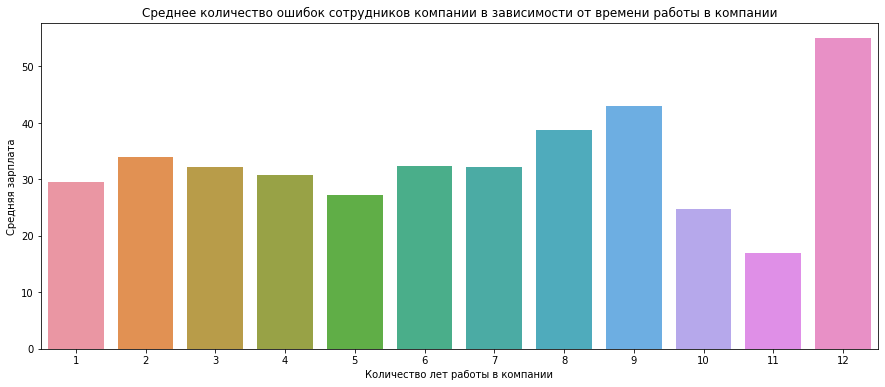

In [55]:
fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(data=staff_df, x = staff_df["Длительность работы"], y=staff_df['СрЗарпл'])
ax.set_title('Среднее количество ошибок сотрудников компании в зависимости от времени работы в компании')
ax.set_xlabel('Количество лет работы в компании')
ax.set_ylabel('Средняя зарплата')

In [2]:
# Получение из базы данных информации по сотрудникам компании
sql_query = '''
    select hr.citizendesc, pr."Daily Error Rate" as daily_error_rate
    from hr_dataset hr 
    left join production_staff pr on 
        (hr."Employee Name" = pr."Employee Name") and (hr."Date of Hire" = pr."Date of Hire") and 
        (hr.position = pr."Position")'''

staff_df = pd.read_sql_query(sql_query, conn).fillna(0)

# Вывод среднего числа ежедневных ошибок у групп сотрудников из категории "citizendesc"
staff_df.pivot_table(values='daily_error_rate', index='citizendesc', aggfunc=np.mean)

,daily_error_rate
citizendesc,
Eligible NonCitizen,0.750000
Non-Citizen,1.250000
US Citizen,0.588435


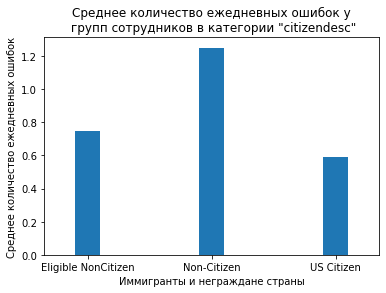

In [3]:
# Переход в интерактивный режим построения графиков и диаграмм
%matplotlib inline

# Импорт библиотеки Matplotlib
import matplotlib.pyplot as plt
# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(6, 4))

# Отражение среднего числа ежедневных ошибок у групп сотрудников из категории "citizendesc"
staff_df.pivot_table(values='daily_error_rate', index='citizendesc', aggfunc=np.mean).plot.bar(
    ax=ax, width=0.2, title='Среднее количество ежедневных ошибок у\n групп сотрудников в категории "citizendesc"', 
    rot=0, legend=None)

# Вывод подписей осей координат
ax.set_xlabel('Иммигранты и неграждане страны')
ax.set_ylabel('Среднее количество ежедневных ошибок')

# Отображение диаграмм на странице
plt.show()

Выводы:
   До 40 лет больше ошибок совершают женщины. Среднее количество ошибок резко возрастает в 66 лет. Причем все эти ошибки совершают сотрудники женского пола. Среди мужчин максимальное среднее количество ошибок совершается в 51 год.
Зарплата сотрудников после 28 лет и до 33 лет равномерно снижается не зависимо от пола, c 33 до 53 зарплата мужчин и женщин заметно различается в пользу мужчин.
Семейное положение почти не влияет на количество ошибок. Семейное положение почти не влияет на зарплату, однако холостые и незамужние совершают немного меньше ошибок, их средняя зарплата немного ниже.
   Сотрудники являющиеся гражданами Соединенных Штатов Америки более добросовестно выполняют работу и значительно меньше допускают ежедневных ошибок.
   Первые 6 лет работы в компании количество ежедневных ошибок, совершаемых сотрудником одинаково. Количество ежедневных ошибок резко уменьшается с 7 до 10 лет работы в компании, сотрудники совершают меньше всего ошибок. Нужно мотивировать сотрудника на продолжение работы в компании. Резкий рост ошибок наблюдается после 10 лет работы в компании. Средняя зарплата на протяжении первых 5 лет работы в компании не меняется, следующие 4 года наблюдается рост средней зарплаты и резкое уменьшение зарплаты в 10 и 11-й годы работы в компании. Сотрудники, работающие 12-й год в компании получают наибольшую среднюю зарплату.      
   Наиболее знычимыми факторами, повышающими ценность сотрудника для компании, является опыт работы в компании, начиная с 6 лет непрерывной работы необходимо мотивировать сотрудника продолжать сотрудничество с компанией. После 10 лет работы в компании сотрудник выгорает, совершает больше ошибок, возможно, необходимо улучшить условия труда таких сотрудников, чтобы не происходило выгорания.
   При найме персонала, можно рекомендовать следующее:
сотрудник должен быть гражданином Соединенных Штатов Америки, не важно мужчина или женщина в возрасте до 32 лет, либо мужчина после 32 до 50 лет, либо женщина после 40 лет до 60 лет. Лучше чтобы сотрудник имел среднее материальное положение и был холост, не замужем.